# Data Statistics and Evaluation

In the following demo, we will:
* Calculate total number of hours recorded for each site and locate files which could not be read with TuneR's readwave function.
* Calculate Summary Statistcs for each Bioacoustic Index
* Visualization of Indices
* Cluster Analysis (for indices)
* Correlation Analysis (for indices)
* Cluster Analysis following Correlation Analysis. 

In [66]:
library(tuneR)
library(tidyr)
library(ggplot2)
library(factoextra)
library(cluster)
library(plyr)

## Basic Sound Data Statistics and Data 

The following code gives the hours recorded at each site (along with the total. Uncommenting the the expressions in the warning/error brackets also gives the files which could not be processed using TuneR's readWave function along with why the function fails (8 failed files). Errors include:
* bin-reading error(2 files): ``` <simpleError in readBin(con, int, n = 4, size = 1, endian = "little", signed = FALSE) %*% 2^c(0, 8, 16, 24): non-conformable arguments> ```
* char-reading error(3 files): ``` <simpleError in readChar(con, 4): invalid UTF-8 input in readChar()> ```
* non-valid WAVE file(3 files): ``` <simpleError in readWave(soundfile, header = TRUE): This seems not to be a valid RIFF file of type WAVE.> ```

In [7]:
DATA_LIBRARY_PATH<- "/media/colton/My Passport/data_library"
file.paths <- list.files(DATA_LIBRARY_PATH)
total <- 0
nonproblem_files <- 0
total_files <- 0
for (i in 1:length(file.paths)){
  duration <- 0
  sitepath <- paste(DATA_LIBRARY_PATH,file.paths[i],sep='/')
  sitefiles <- list.files(sitepath,recursive=TRUE, pattern = "wav$")
  for (j in 1:length(sitefiles)){
    soundfile <- paste(sitepath,sitefiles[j],sep='/')
    total_files <- total_files + 1
    result <- tryCatch(expr={
    hdr <- readWave(soundfile,header=TRUE)
    sr <- hdr$sample.rate
    samples<-hdr$samples
    duration <- duration + samples/(sr*3600)
    nonproblem_files <- nonproblem_files + 1
    }, warning = function(w) {
      #print(w)
      #print(soundfile)
    }, error = function(e) {
      #print(e)
      #print(soundfile)
    })
}
  total <- duration + total
  print(paste(file.paths[i],duration,sep=": "))
}
print(paste("Total",total,sep=": "))
print(paste("Non-Problem Files",nonproblem_files,sep=": "))
print(paste("Total Files",total_files,sep=": "))

[1] "Audubon_Society: 29.3517748148148"
[1] "Biosphere_2: 27.2658311111111"
[1] "Chuparosa_Inn: 21.59808"
[1] "Desert_museum: 39.1802755555556"
[1] "Empire_Ranch: 24.7657748148148"
[1] "Gates Pass: 123.29344"
[1] "Jake: 91.3273303703704"
[1] "Nirav: 95.5661096296297"
[1] "Patagonia_lake: 25.5610548148148"
[1] "Paton_Hummingbird: 24.87544"
[1] "Proctor_road: 24.993522962963"
[1] "Ruth: 111.326684444445"
[1] "Sabino_canyon: 50.0686074074074"
[1] "Saguaro_NP: 136.065831111111"
[1] "Silvestrer_Spring: 24.6300503703704"
[1] "Sweetwater: 140.433386666667"
[1] "Theresa: 105.168971851852"
[1] "Tumamoc: 163.181576296296"
[1] "Total: 1258.65374222222"
[1] "Non-Problem Files: 1301"
[1] "Total Files: 1309"


In [110]:
INDEX_CSV <- "/media/colton/My Passport/final.csv"
index_data <- read.csv(INDEX_CSV,header=TRUE)
head(index_data)

,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,spectral_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_evenness....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Audubon_Society,2019-04-18,11:12:36,101.0132,0.09830943,0.9724801,0.8142960,0.7918867,1.811299,0.514931,196.6844,1,0.4799106
2,Audubon_Society,2019-04-18,11:17:36,113.4433,0.11335600,0.9730184,0.8080708,0.7862678,1.767159,0.539738,201.1060,0,0.8579672
3,Audubon_Society,2019-04-18,11:22:36,125.1966,0.20363086,0.9820155,0.7945508,0.7802612,1.744127,0.557559,196.8785,0,0.5911719
4,Audubon_Society,2019-04-18,11:27:36,147.6329,0.16143239,0.9848378,0.7754547,0.7636971,1.768792,0.530202,211.8268,0,0.8497890
5,Audubon_Society,2019-04-18,11:32:36,120.6462,0.18025170,0.9826372,0.7972910,0.7834478,1.733753,0.558135,199.5438,1,0.5483259
6,Audubon_Society,2019-04-18,11:37:36,150.6320,0.09876261,0.9809657,0.7997804,0.7845571,1.580442,0.617017,191.5337,0,0.7192530


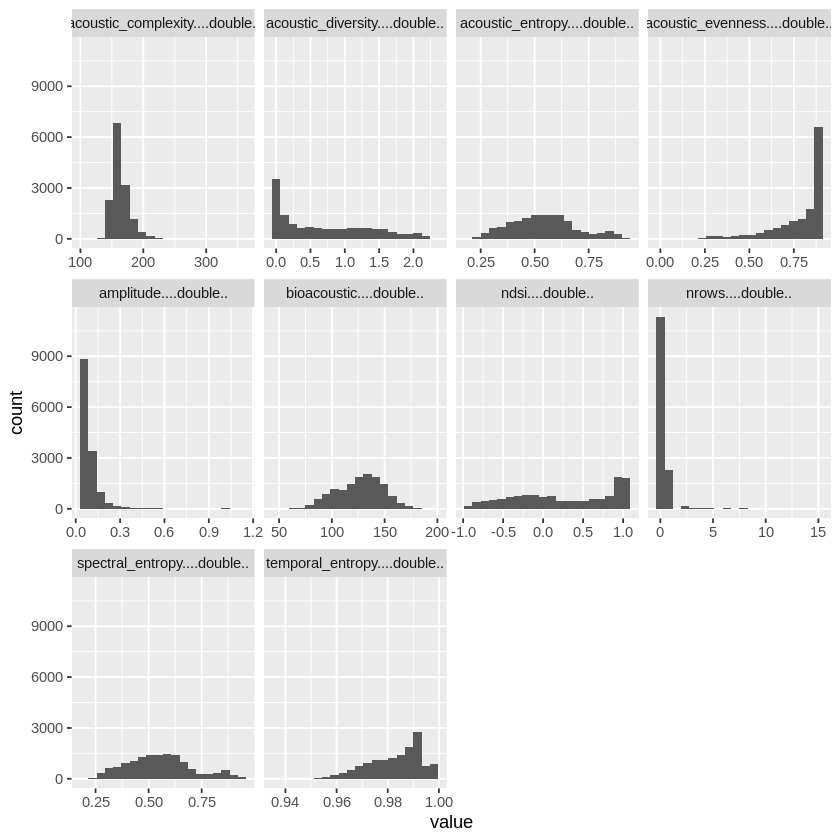

In [9]:
ggplot(gather(index_data[,4:13]), aes(value)) + 
    geom_histogram(bins = 20) + 
    facet_wrap(~key, scales = 'free_x')

In [47]:
summary(index_data)
#colnames(index_data)

      x             bioacoustic....double.. amplitude....double..
 Length:14093       Min.   : 48.39          Min.   :0.03201      
 Class :character   1st Qu.:110.06          1st Qu.:0.04953      
 Mode  :character   Median :128.44          Median :0.06864      
                    Mean   :126.22          Mean   :0.09350      
                    3rd Qu.:142.35          3rd Qu.:0.10508      
                    Max.   :198.07          Max.   :1.10075      
 temporal_entropy....double.. spectral_entropy....double..
 Min.   :0.9379               Min.   :0.1970              
 1st Qu.:0.9757               1st Qu.:0.4428              
 Median :0.9852               Median :0.5464              
 Mean   :0.9829               Mean   :0.5522              
 3rd Qu.:0.9908               3rd Qu.:0.6417              
 Max.   :0.9996               Max.   :0.9414              
 acoustic_entropy....double.. acoustic_diversity....double..
 Min.   :0.1965               Min.   :0.00000               
 1s

[1] "x"                               "bioacoustic....double.."        
 [3] "amplitude....double.."           "temporal_entropy....double.."   
 [5] "spectral_entropy....double.."    "acoustic_entropy....double.."   
 [7] "acoustic_diversity....double.."  "acoustic_evenness....double.."  
 [9] "acoustic_complexity....double.." "nrows....double.."              
[11] "ndsi....double.."                "fit.cluster"                    
[13] "recording"

In [117]:
#row.names(index_data) <- paste(index_data$Site, "-", index_data$Date....as.Date.character....format.....Y..m..d..,"-",index_data$Time....character..)
index_data[,4:13] <- scale(index_data[,4:13])
index_data <- arrange(index_data,Time....character..)
head(index_data)


,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,spectral_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_evenness....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..,fit.cluster
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Audubon_Society,2019-04-19,0:0:0,0.37421413,0.6074155,-0.04154135,0.5240720,0.5193424,0.05873989,0.3179794,-0.63086116,-0.3177701,-1.8072565,1
2,Biosphere_2,2019-06-19,0:0:0,-0.09368165,-0.6002595,0.98053769,0.7030158,0.7433867,1.51561021,-1.5263628,0.19189713,0.7502799,1.2290200,2
3,Chuparosa_Inn,2019-04-07,0:0:0,1.09648171,-0.3147842,1.16861632,1.1086775,1.1611584,1.97391037,-2.4712240,-0.98923651,-0.3177701,-0.3081954,2
4,Desert_museum,2019-05-24,0:0:0,-0.89520146,-0.4576655,-1.60460676,-1.3389082,-1.3742461,-1.06163557,0.7550745,0.61764294,-0.3177701,1.1264933,1
5,Desert_museum,2019-05-25,0:0:0,-1.10748462,-0.6205482,0.70475740,-0.8962191,-0.8750987,0.12597146,0.2127962,0.25300615,0.7502799,1.2130614,1
6,Empire_Ranch,2019-04-14,0:0:0,-1.42715033,0.6214505,-0.18505717,-1.9768491,-1.9755532,-1.06163557,0.7550745,0.01852995,-0.3177701,-0.3581280,1


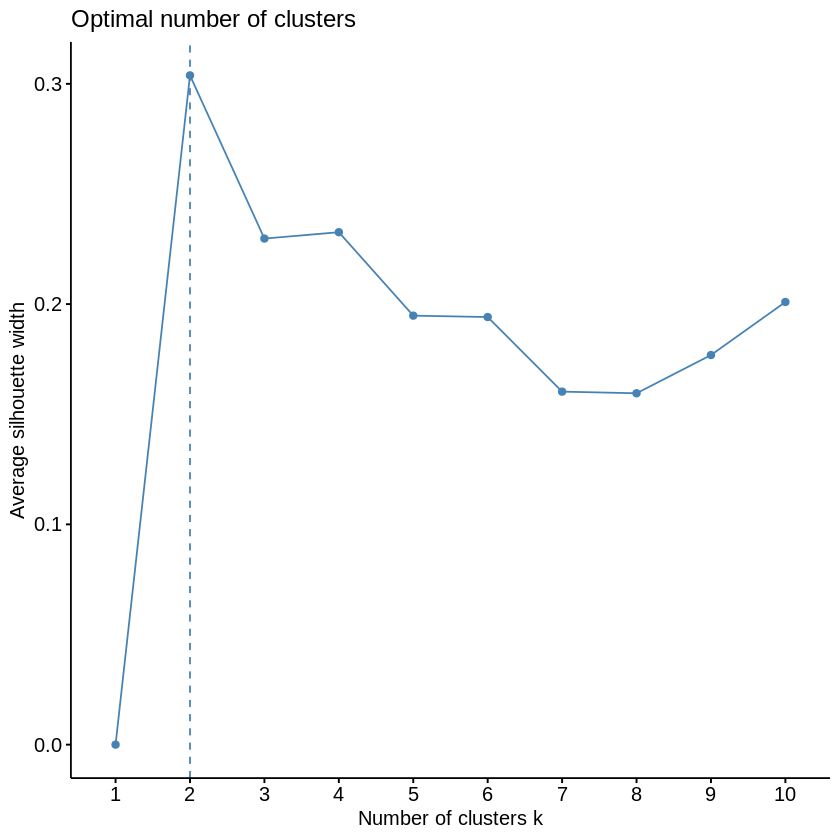

In [23]:
fviz_nbclust(index_data,FUNcluster=clara,method = "silhouette",k.max=10,verbose=TRUE)

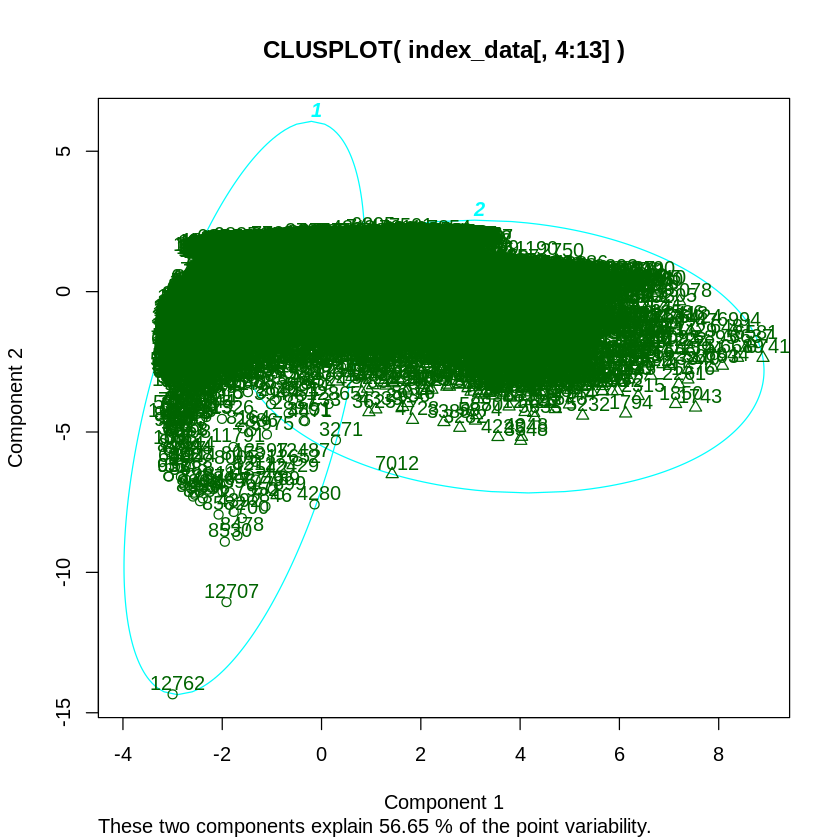

In [113]:
# K-Means Clustering with 5 clusters
fit <- kmeans(index_data[,4:13], 2)

# Cluster Plot against 1st 2 principal components

# vary parameters for most readable graph
clusplot(index_data[,4:13], fit$cluster, color=FALSE, shade=FALSE,
   labels=2, lines=0)

index_data <- data.frame(index_data, fit$cluster) 

In [114]:
first_cluster <- subset(index_data, fit.cluster=="1")
second_cluster <- subset(index_data, fit.cluster=="2")

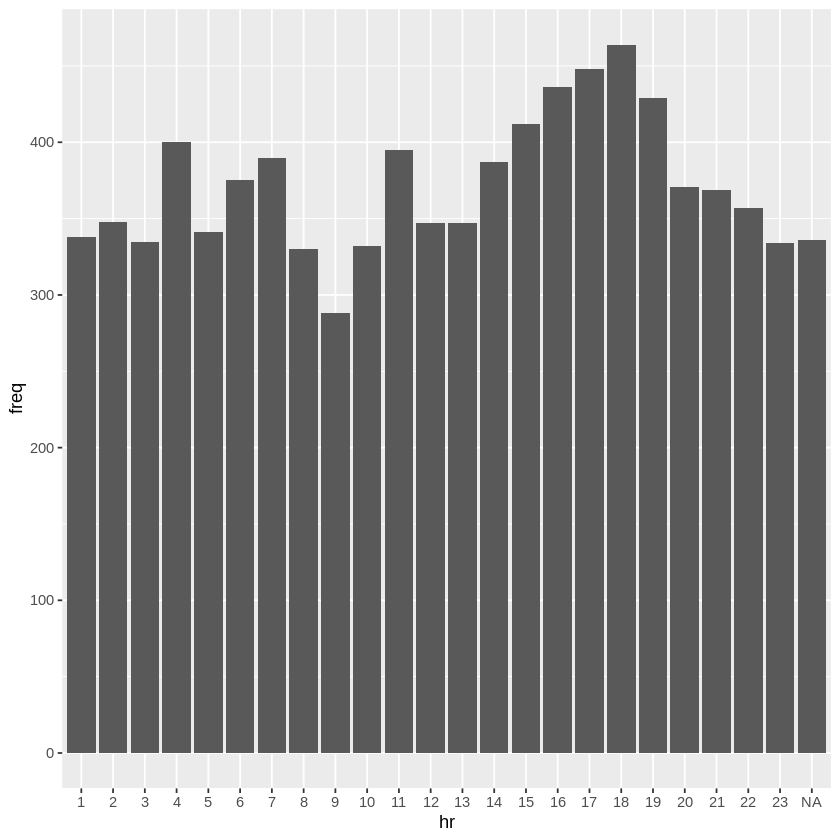

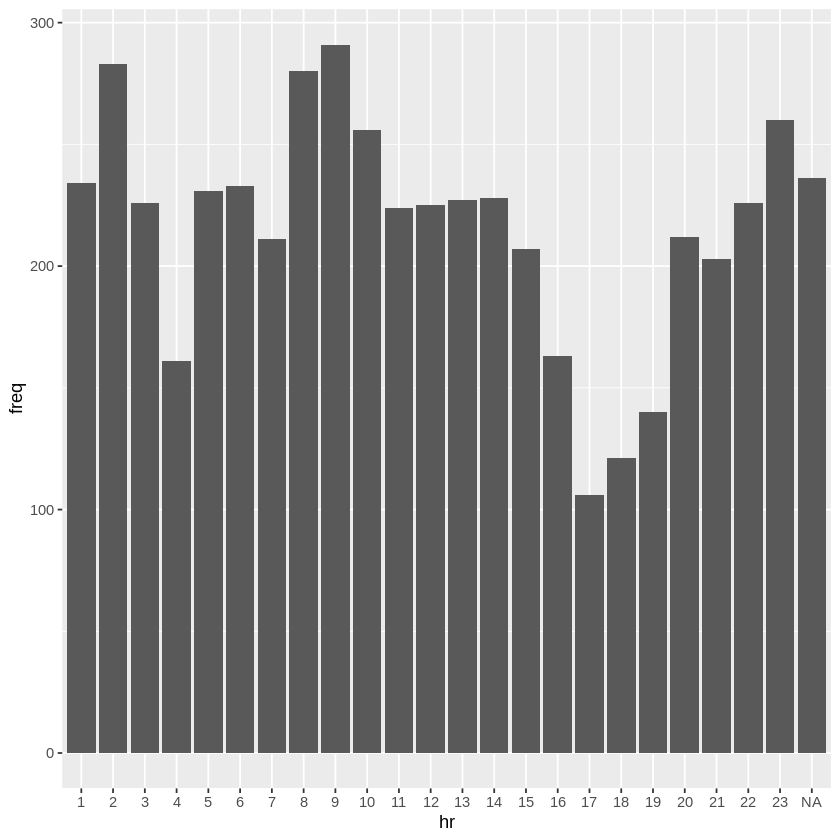

In [122]:
splitter <- function(x) {return(strsplit(x,":")[[1]][1])}
first_cluster$hr <- sapply(as.character(first_cluster$Time....character..),splitter)
second_cluster$hr <- sapply(as.character(second_cluster$Time....character..),splitter)
first_count = count(first_cluster, vars = c("hr"))
second_count = count(second_cluster, vars = c("hr"))
first_count %>% arrange(hr) %>% mutate(hr=factor(hr, levels=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24))) %>% ggplot() + geom_bar(aes(x = hr, y = freq), stat="identity")
second_count %>% arrange(hr) %>% mutate(hr=factor(hr, levels=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24))) %>% ggplot() + geom_bar(aes(x = hr, y = freq), stat="identity")

